In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import numpy.linalg as linalg
from numpy.linalg import inv
import math


In [19]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
hallway1 = cv2.imread("/content/drive/My Drive/CSC420/A4/hallway1.jpg")
hallway1 = cv2.cvtColor(hallway1, cv2.COLOR_RGB2GRAY)
hallway2 = cv2.imread("/content/drive/My Drive/CSC420/A4/hallway2.jpg")
hallway2 = cv2.cvtColor(hallway2, cv2.COLOR_RGB2GRAY)
hallway3 = cv2.imread("/content/drive/My Drive/CSC420/A4/hallway3.jpg")
hallway3 = cv2.cvtColor(hallway3, cv2.COLOR_RGB2GRAY)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(25, 13))
fig.suptitle('Q4.1')


In [5]:
#right wall hallway1
matches1_A = [[844, 232], [839, 659], [735, 557], [737, 332]]
#right wall hallway2
matches2_A = [[702, 547], [720, 984], [606, 880], [600, 654]]

#right wall hallway1
matches1_B = [[844, 232], [839, 659], [735, 557], [737, 332]]
#right wall hallway3
matches2_B = [[819, 422], [828, 856], [761, 748], [759, 527]]

#floor hallway1
matches1_C = [[717, 545], [655, 547], [483, 776], [840, 662]]
#floor hallway3
matches2_C = [[753, 739], [688, 741], [418, 980], [829, 855]]

In [61]:
def homography(point1, point2):
    result = np.zeros((2*len(point1), 9))
    for i in range(len(point1)):
        x1, y1 = point1[i][0], point1[i][1]
        x2, y2 = point2[i][0], point2[i][1]
        result[2*i] = np.array([x1,y1,1,0,0,0,-x2*x1, -x2*y1, -x2])
        result[2*i+1] = np.array([0,0,0,x1,y1,1,-y2*x1, -y2*y1, -y2])


    ATA = result.T @ result
    eigenval, eigenvec = np.linalg.eig(ATA)
    min_eigenval = np.argmin(np.abs(eigenval))
    h = eigenvec[:,min_eigenval]
    h = h / h[8]
    print(h)
    return h.reshape((3,3))

def mapped_coordinate(H, x, y):
    v = np.array([x, y, 1])
    u = H @ v
    u = u / u[2]
    return int(u[0]), int(u[1])

In [53]:
homography(matches1_A, matches2_A)



[ 7.46343415e-01 -5.28880844e-02 -2.39607419e+01 -1.74322083e-01
  7.30520701e-01  4.40246222e+02 -1.45210989e-04 -1.36808324e-04
  1.00000000e+00]


array([[ 7.46343415e-01, -5.28880844e-02, -2.39607419e+01],
       [-1.74322083e-01,  7.30520701e-01,  4.40246222e+02],
       [-1.45210989e-04, -1.36808324e-04,  1.00000000e+00]])

In [66]:
def cases(case):
  if case == 'A':
    matches1, matches2 = matches1_A, matches2_A
    img1, img2 = hallway1.copy(), hallway2.copy()
  if case == 'B':
    matches1, matches2 = matches1_B, matches2_B
    img1, img2 = hallway1.copy(), hallway3.copy()
  if case == 'C':
    matches1, matches2 = matches1_C, matches2_C
    img1, img2 = hallway1.copy(), hallway3.copy()
  fig, axes = plt.subplots(2, 2, figsize=(25, 13))
  fig.suptitle(f'Case {case}')
  
  #Q4.1 
  img1_cpy = img1.copy()
  img2_cpy = img2.copy()
  for x, y in matches1:
    cv2.rectangle(img1_cpy, (x - 15, y - 15), (x + 15, y + 15), (255, 255, 0), 5)
  for x, y in matches2:
    cv2.rectangle(img2_cpy, (x - 15, y - 15), (x + 15, y + 15), (255, 255, 0), 5)
  axes[0, 0].imshow(img1_cpy)
  axes[0, 0].set_title('matches 1 Selected Points')
  axes[0, 1].imshow(img2_cpy)
  axes[0, 1].set_title('matches 2 Selected Points')
  #Q4.2
  H = homography(matches1, matches2)
  #Q4.3
  img2_cpy = img2.copy()
  for x, y in matches1:
    new_x, new_y = mapped_coordinate(H, x, y)
    cv2.rectangle(img2_cpy, (new_x - 9, new_y - 9), (new_x + 9, new_y + 9), (255, 255, 0), 3)
  for x,y in matches2: 
    cv2.rectangle(img2_cpy, (x - 15, y - 15), (x + 15, y + 15), (0, 0, 0), 5)
  axes[1, 0].imshow(img2_cpy)
  axes[1, 0].set_title('Esimated Points')
  #Q4.4
  padding_size = 500
  img3 = np.zeros((img1.shape[0] +  2 * padding_size, img1.shape[1] + 2 * padding_size, 3))
  img3[padding_size:padding_size + img1.shape[0], padding_size:padding_size + img1.shape[1], 0] = img1
  for x in range(img3.shape[0]):
      for y in range(img3.shape[1]):
          y_, x_ = mapped_coordinate(H, y, x)
          if x_ >= padding_size and x_ < padding_size + img2.shape[0] \
              and y_ >= padding_size and y_ < padding_size + img2.shape[1]:
              img3[x, y, 1] = img2[x_ - padding_size, y_ - padding_size]
              img3[x, y, 2] = img2[x_ - padding_size, y_ - padding_size]
  img3 /= 255
  
  axes[1, 1].imshow(img3)
  axes[1, 1].set_title('Inverse Mapping')
  plt.show()

  


[ 7.46343415e-01 -5.28880844e-02 -2.39607419e+01 -1.74322083e-01
  7.30520701e-01  4.40246222e+02 -1.45210989e-04 -1.36808324e-04
  1.00000000e+00]


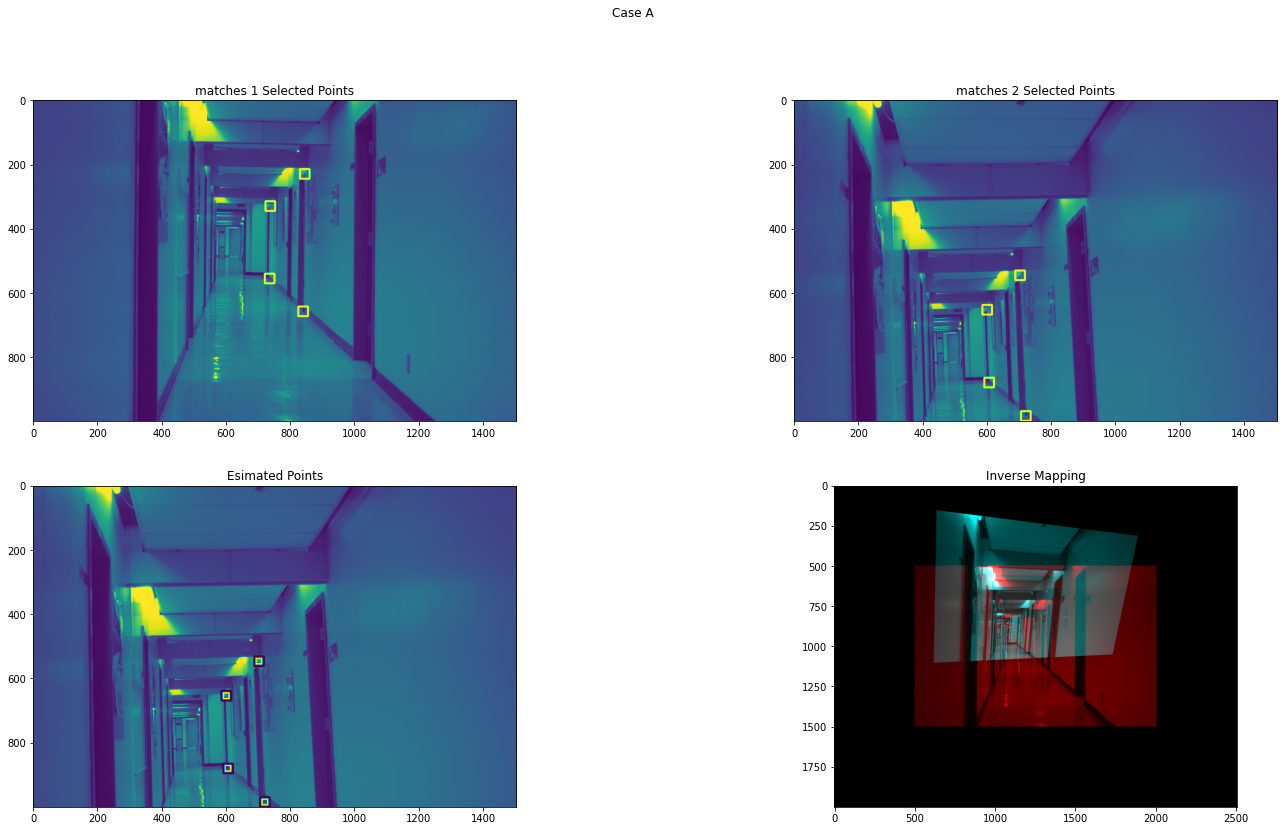

In [63]:
cases("A")

[ 2.59139628e-01 -1.10259738e-01  4.32591244e+02 -1.97159318e-01
  6.40452876e-01  3.40230044e+02 -2.35890575e-04 -1.59040357e-04
  1.00000000e+00]


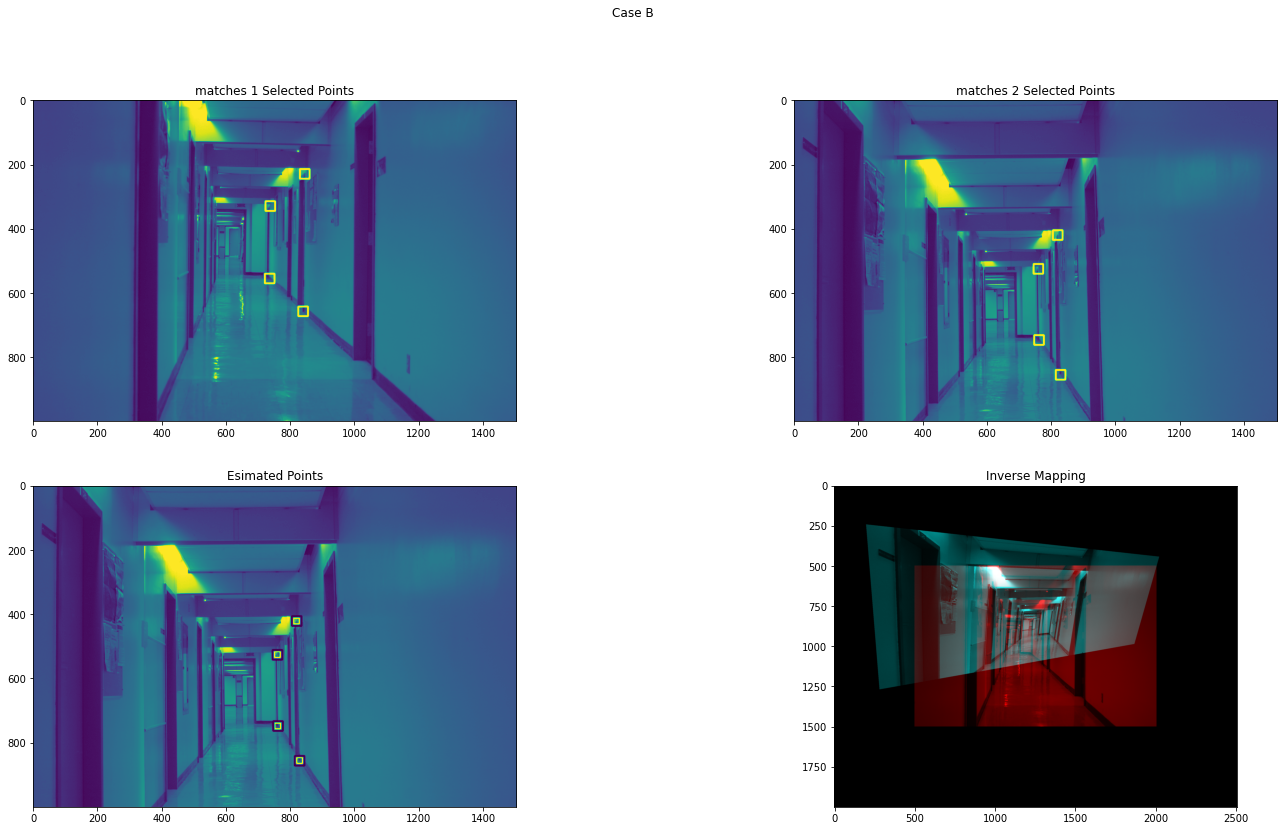

In [64]:
cases("B")

[ 1.52736403e+00 -3.64181964e-01  8.17429411e+01  1.96751154e-01
  1.49134479e+00  6.33987977e+00  2.63688598e-04  2.02293139e-04
  1.00000000e+00]


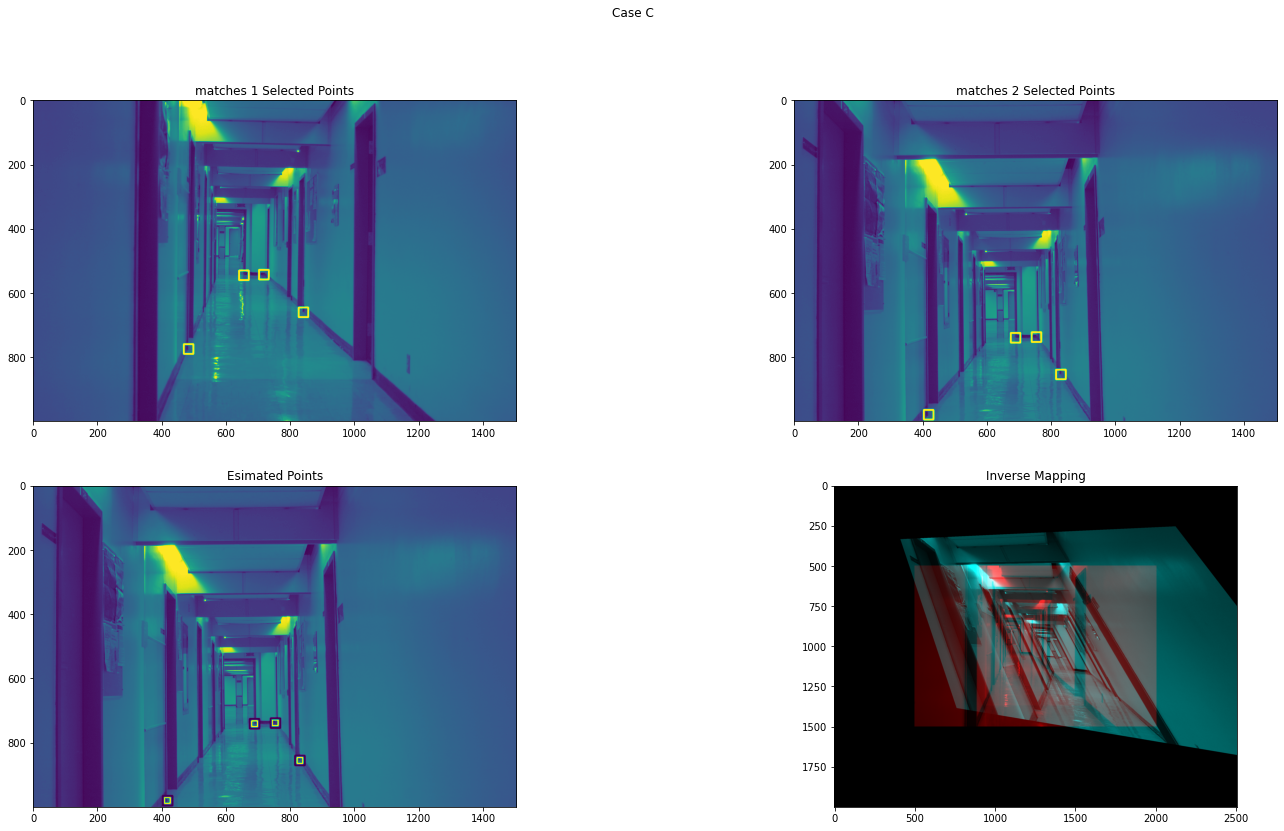

In [67]:
cases("C")